In [77]:
import lzma
import pickle

import matplotlib.pyplot as plt
import numpy as np

from functools import reduce
from math import sqrt

In [78]:
with lzma.open("records/record_241106093055.npz", "rb") as file:
    controls, positions = reduce(
        lambda res, sensor: ([*res[0], sensor.current_controls], [*res[1], [sensor.car_position[0], sensor.car_position[2]]]),
        pickle.load(file),
        ([], [])
    )

In [79]:
frames_per_trajectory = 10

controls = [controls[i:i + frames_per_trajectory] for i in range(0, len(controls), frames_per_trajectory)]
positions = [positions[i:i + frames_per_trajectory] for i in range(0, len(positions), frames_per_trajectory)]

In [80]:
mean_speeds = []
stds = []

for ps in positions[:-1]:
    # per trajectory
    speeds = []
    
    last_x, last_y = ps[0][0], ps[0][1]   
    for (x, y) in map(lambda p: (p[0], p[1]), ps[1:]):
        dx = x - last_x
        dy = y - last_y

        current_speed = sqrt(dx**2 + dy**2)
        speeds.append(current_speed)

        last_x = x
        last_y = y

    mean_speed = sum(speeds) / frames_per_trajectory

    std = 0
    for speed in speeds:
        std += (speed - mean_speed)**2
    std /= (frames_per_trajectory - 1)

    mean_speeds.append(mean_speed)
    stds.append(std)

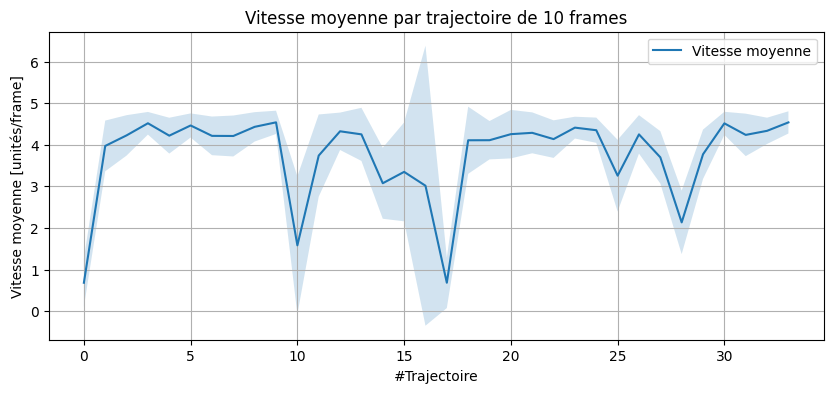

In [81]:
plt.figure(figsize=(10, 4))

plt.plot(mean_speeds, label="Vitesse moyenne")
plt.fill_between(range(0, len(mean_speeds)), np.subtract(mean_speeds, stds), np.add(mean_speeds, stds), alpha=.2)

plt.xlabel("#Trajectoire")
plt.ylabel("Vitesse moyenne [unités/frame]")

plt.title(f"Vitesse moyenne par trajectoire de {frames_per_trajectory} frames")
plt.legend()
plt.grid()
plt.show()

In [82]:
print(f"Min.: {min(stds)}, max.: {max(stds)}, mean: {sum(stds) / len(stds)}")

Min.: 0.26261475538546236, max.: 3.368475295336733, mean: 0.6491760507633746
